<a href="https://colab.research.google.com/github/zgbl/WeiqiBoardDetect/blob/main/notebooks/WQBD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#安装中文支持
#!apt-get -y install fonts-noto-cjk
# 删除损坏字体（如果之前下载了）
!rm -f /usr/share/fonts/truetype/simhei.ttf

# ✅ 从 GitHub 安装 SimHei 字体（有效版本）
!wget https://github.com/guofei9987/scikit-opt/raw/master/examples/simhei.ttf -O /usr/share/fonts/truetype/simhei.ttf
!fc-cache -fv

--2025-06-13 20:58:23--  https://github.com/guofei9987/scikit-opt/raw/master/examples/simhei.ttf
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-13 20:58:24 ERROR 404: Not Found.

/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/opentype/noto: caching, new cache contents: 30 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/opentype: skipping, looped directory detected
/usr/s

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm

In [3]:
from google.colab import files
import os
from PIL import Image

In [4]:
uploaded = files.upload()

Saving Pic1.jpg to Pic1 (5).jpg


In [5]:
#2加载图像
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
# 查找 Colab 中所有 Noto 字体
!fc-list :lang=zh | grep "NotoSansCJK" || fc-list | grep "Noto"

# 设置一个已安装的中文字体
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"

# 设置 matplotlib 使用该字体
font_prop = fm.FontProperties(fname=font_path)
#plt.rcParams['font.family'] = font_prop.get_name()
#plt.rcParams['axes.unicode_minus'] = False  # 负号正常显示

/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK JP:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK HK:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK KR:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK SC:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans CJK TC:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc: Noto Sans Mono CJK TC:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc: Noto Sans Mono CJK SC:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc: Noto Sans Mono CJK KR:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc: Noto Sans Mono CJK HK:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc: Noto Sans Mono CJK JP:style=Bold
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc: Noto Sans Mono CJK SC:style=Regular
/usr/share/fonts/opentype/noto/NotoSansCJK-

In [7]:
# 获取字体名称，供 rcParams 使用
print(fm.FontProperties(fname=font_path).get_name())

Noto Sans CJK JP


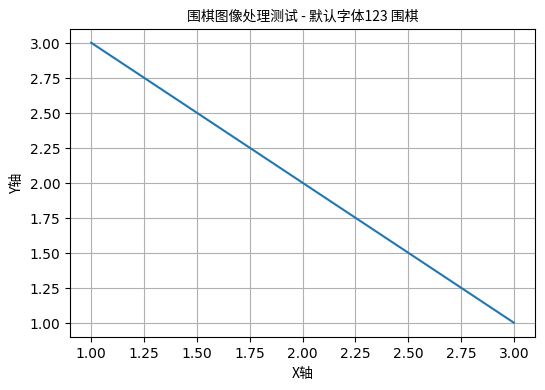

In [9]:
# ✅ 测试是否显示中文
plt.figure(figsize=(6,4))
plt.plot([1, 2, 3], [3, 2, 1])
plt.title("围棋图像处理测试 - 默认字体123 围棋", fontproperties=font_prop)
plt.xlabel("X轴", fontproperties=font_prop)
plt.ylabel("Y轴", fontproperties=font_prop)
plt.grid()
plt.show()

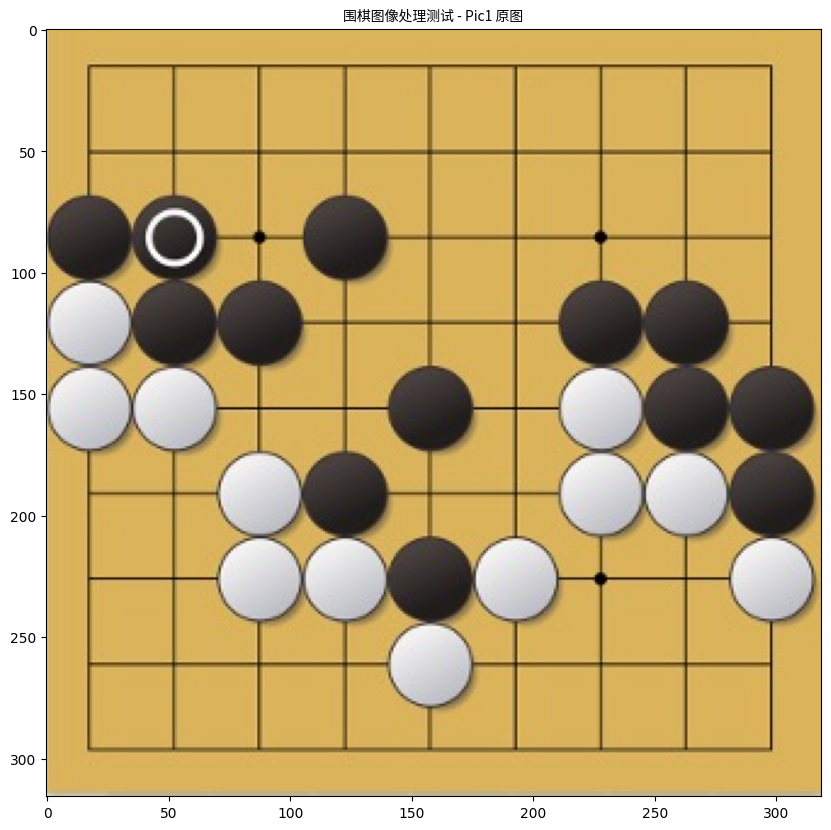

In [11]:
#3 显示原图
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
#plt.title("Pic1 原图")
plt.title("围棋图像处理测试 - Pic1 原图", fontproperties=font_prop)
plt.show()

In [9]:
# Step 4: 假设整张图已经是棋盘（如果没有歪斜的话）
# 若不是完整棋盘图，可以先做 perspective transform，后续补上
height, width, _ = img.shape
grid_size = 19
cell_h = height // grid_size
cell_w = width // grid_size